In [2]:
import os
import sys
import random
import warnings

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook, tnrange

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [3]:
train_image_dir = 'data/skin/train/images/'
train_mask_dir = 'data/skin/train/masks/'

### Note: images and masks should match bothe the file names and the extension.

In [4]:
path = 'data/skin/train/masks'
for f in os.listdir(path):
    os.rename(os.path.join(path, f), os.path.join(path, f.replace("_segmentation.png",".png")))

In [5]:
# Source: https://gist.github.com/qingswu/1a58c9d66dfc0a6aaac45528bbe01b82
from glob import glob                                                           
import cv2 
png_images = glob('data/skin/train/masks/*.png')

for j in png_images:
    imgs = cv2.imread(j)   # read all images
    cv2.imwrite(j[:-3] + 'jpg', imgs)  # convert images from png to jpg
    os.remove(j)  # remove all .png images

# using glob('./**/*.png', recursive=True) for all sub folders.

___

In [6]:
train_images_filenames = os.listdir(train_image_dir)
len(train_images_filenames), train_images_filenames

(8,
 ['ISIC_0000050.jpg',
  'ISIC_0000048.jpg',
  'ISIC_0000044.jpg',
  'ISIC_0000046.jpg',
  'ISIC_0000051.jpg',
  'ISIC_0000045.jpg',
  'ISIC_0000049.jpg',
  'ISIC_0000047.jpg'])

In [7]:
train_masks_filenames = os.listdir(train_mask_dir)
len(train_masks_filenames), train_masks_filenames

(8,
 ['ISIC_0000050.jpg',
  'ISIC_0000048.jpg',
  'ISIC_0000044.jpg',
  'ISIC_0000046.jpg',
  'ISIC_0000051.jpg',
  'ISIC_0000045.jpg',
  'ISIC_0000049.jpg',
  'ISIC_0000047.jpg'])

In [8]:
imageSize= 150
imgChannel = 1

train_path = 'data/skin/train'

In [9]:
# Create  containers for images and masks
X_train = np.zeros((len(train_images_filenames), imageSize, imageSize, imgChannel), dtype=np.uint8)
Y_train = np.zeros((len(train_masks_filenames), imageSize, imageSize, 1), dtype=np.bool)

In [10]:
print('Resizing train images and masks and converting them into numpy arrays ... ')

for n, id_ in tqdm_notebook(enumerate(train_images_filenames), total=len(train_images_filenames)):
    path= 'data/skin/train'
    img = load_img(train_path + '/images/' + id_)
    x = img_to_array(img)[:,:,1]
    x = resize(x, (imageSize, imageSize, 1), mode='constant', preserve_range=True)
    X_train[n] = x
    mask = img_to_array(load_img(train_path + '/masks/' + id_))[:,:,1]
    Y_train[n] = resize(mask, (imageSize, imageSize, 1), mode='constant', preserve_range=True)

print('Done!')

Resizing train images and masks and converting them into numpy arrays ... 



Done!


In [11]:
X_train.shape

(8, 150, 150, 1)

In [12]:
Y_train.shape

(8, 150, 150, 1)

In [13]:
ix = random.randint(0, len(train_images_filenames))
ix

5

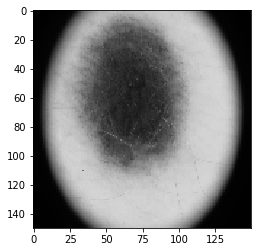

In [14]:
plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
plt.show()

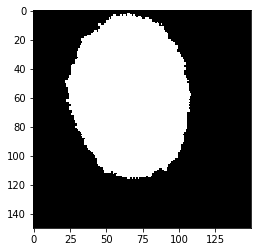

In [15]:
tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()

___

### Saving images and masks into numpy files

In [16]:
images = np.save("npy/images.npy", X_train)
masks = np.save("npy/masks.npy", Y_train)

### Loading images and masks into numpy files

In [17]:
images = np.load("npy/images.npy")
masks = np.load("npy/masks.npy")

In [18]:
print(len(images))

8


In [19]:
print(len(masks))

8


### Show some images and masks randomly

In [22]:
ix = random.randint(0, len(train_images_filenames))
ix

2

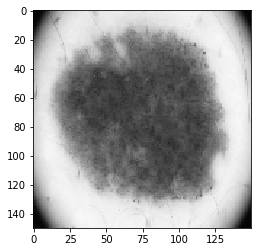

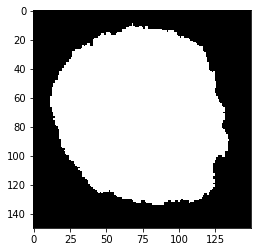

In [23]:
plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
plt.show()


tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()

### Show a specific image and mask

In [24]:
ix = 3

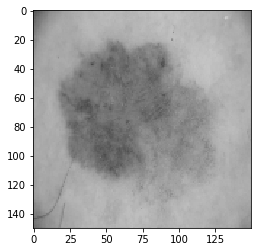

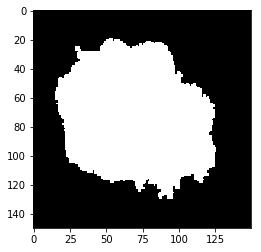

In [25]:
plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
plt.show()


tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()